In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [3]:
plt.rcParams['animation.writer']='ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = "f:\\ld_tools\\ffmpeg\\bin\\ffmpeg.exe"

rc('animation', html='html5')

In [4]:
Lx = 2.0
Ly = 2.0
nx = 64
ny = 64
h = Lx / (nx - 1)

nt = 10000


X = np.zeros((ny, nx))
Y = np.zeros((ny, nx))
for j in range(nx):
    for i in range(ny):
        X[i, j] = 0.0 + j * h
        Y[i, j] = 0.0 + i * h

residial_jacobian = []
F = np.zeros((ny, nx))
F[int(nx/4):int(3*nx/4), 0] = 1.0
Fo = F.copy()
for n in range(1, nt):
    resdial = -999.0
    for j in range(1, nx-1):
        for i in range(1, ny - 1):
            F[i, j] = 0.25 * (Fo[i+1, j] + Fo[i-1, j] + Fo[i, j+1] + Fo[i, j-1])
            if abs(Fo[i, j]) < 1.0e-6:
                if resdial < abs(F[i, j] - Fo[i, j]):
                    resdial = abs(F[i, j] - Fo[i, j])
            else:
                if resdial < abs(F[i, j] - Fo[i, j]) / Fo[i, j]:
                    resdial = abs(F[i, j] - Fo[i, j]) / Fo[i, j]
    Fo = F.copy() 
    residial_jacobian.append([n, resdial])
    if resdial < 1.0e-3:

        print(n)
        break

residial_jacobian = np.array(residial_jacobian)

1567


In [5]:
Lx = 2.0
Ly = 2.0
nx = 64
ny = 64
h = Lx / (nx - 1)

nt = 10000


X = np.zeros((ny, nx))
Y = np.zeros((ny, nx))
for j in range(nx):
    for i in range(ny):
        X[i, j] = 0.0 + j * h
        Y[i, j] = 0.0 + i * h

residial_GS = []
F = np.zeros((ny, nx))
F[int(nx/4):int(3*nx/4), 0] = 1.0
Fo = F.copy()
for n in range(1, nt):
    resdial = -99.0
    for j in range(1, nx-1):
        for i in range(1, ny - 1):
            F[i, j] = 0.25 * (Fo[i+1, j] + F[i-1, j] + Fo[i, j+1] + F[i, j-1])
            if abs(Fo[i, j]) < 1.0e-6:
                if resdial < abs(F[i, j] - Fo[i, j]):
                    resdial = abs(F[i, j] - Fo[i, j])
            else:
                if resdial < abs(F[i, j] - Fo[i, j]) / Fo[i, j]:
                    resdial = abs(F[i, j] - Fo[i, j]) / Fo[i, j]
    Fo = F.copy()
    residial_GS.append([n, resdial])
    if resdial < 1.0e-3:
        print(n)
        break
residial_GS = np.array(residial_GS)

979


In [6]:
Lx = 2.0
Ly = 2.0
nx = 64
ny = 64
h = Lx / (nx - 1)

nt = 10000


X = np.zeros((ny, nx))
Y = np.zeros((ny, nx))
for j in range(nx):
    for i in range(ny):
        X[i, j] = 0.0 + j * h
        Y[i, j] = 0.0 + i * h

residial_SR = []
omega = 1.9
F = np.zeros((ny, nx))
F[int(nx/4):int(3*nx/4), 0] = 1.0
Fo = F.copy()
for n in range(1, nt):
    resdial = -99.0
    for j in range(1, nx-1):
        for i in range(1, ny - 1):
            F[i, j] = 0.25 * (Fo[i+1, j] + F[i-1, j] + Fo[i, j+1] + F[i, j-1])
            F[i, j] = Fo[i, j] + omega * (F[i, j] - Fo[i, j])
            if abs(Fo[i, j]) < 1.0e-6:
                if resdial < abs(F[i, j] - Fo[i, j]):
                    resdial = abs(F[i, j] - Fo[i, j])
            else:
                if resdial < abs(F[i, j] - Fo[i, j]) / Fo[i, j]:
                    resdial = abs(F[i, j] - Fo[i, j]) / Fo[i, j]
    Fo = F.copy()
    residial_SR.append([n, resdial])
    if resdial < 1.0e-3:
        print(n)
        break
residial_SR = np.array(residial_SR)

109


In [7]:
Lx = 2.0
Ly = 2.0
nx = 64
ny = 64
h = Lx / (nx - 1)

nt = 10000


X = np.zeros((ny, nx))
Y = np.zeros((ny, nx))
for j in range(nx):
    for i in range(ny):
        X[i, j] = 0.0 + j * h
        Y[i, j] = 0.0 + i * h

residial_UR = []
omega = 0.5
F = np.zeros((ny, nx))
F[int(nx/4):int(3*nx/4), 0] = 1.0
Fo = F.copy()
for n in range(1, nt):
    resdial = -99.0
    for j in range(1, nx-1):
        for i in range(1, ny - 1):
            F[i, j] = 0.25 * (Fo[i+1, j] + F[i-1, j] + Fo[i, j+1] + F[i, j-1])
            F[i, j] = Fo[i, j] + omega * (F[i, j] - Fo[i, j])
            if abs(Fo[i, j]) < 1.0e-6:
                if resdial < abs(F[i, j] - Fo[i, j]):
                    resdial = abs(F[i, j] - Fo[i, j])
            else:
                if resdial < abs(F[i, j] - Fo[i, j]) / Fo[i, j]:
                    resdial = abs(F[i, j] - Fo[i, j]) / Fo[i, j]
    Fo = F.copy()
    residial_UR.append([n, resdial])
    if resdial < 1.0e-3:
        print(n)
        break
residial_UR = np.array(residial_UR)

1999


In [8]:
X


array([[ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ],
       [ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ],
       [ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ],
       ..., 
       [ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ],
       [ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ],
       [ 0.        ,  0.03174603,  0.06349206, ...,  1.93650794,
         1.96825397,  2.        ]])

In [9]:
Y

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03174603,  0.03174603,  0.03174603, ...,  0.03174603,
         0.03174603,  0.03174603],
       [ 0.06349206,  0.06349206,  0.06349206, ...,  0.06349206,
         0.06349206,  0.06349206],
       ..., 
       [ 1.93650794,  1.93650794,  1.93650794, ...,  1.93650794,
         1.93650794,  1.93650794],
       [ 1.96825397,  1.96825397,  1.96825397, ...,  1.96825397,
         1.96825397,  1.96825397],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

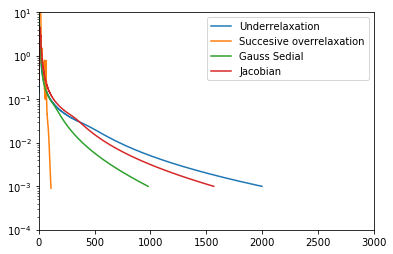

In [10]:
#res_UR 

fig = plt.figure()
ax = plt.axes(xlim = (1, 3000), ylim = (1.0e-4, 10))
ax.semilogy(residial_UR[:, 0], residial_UR[:, 1], label="Underrelaxation")
ax.semilogy(residial_SR[:, 0], residial_SR[:,1], label="Succesive overrelaxation")
ax.semilogy(residial_GS[:, 0], residial_GS[:, 1], label="Gauss Sedial")
ax.semilogy(residial_jacobian[:, 0],residial_jacobian[:, 1] , label="Jacobian")
ax.legend()
plt.show()

In [11]:
Lx = 2.0
Ly = 2.0
nx = 64
ny = 64
h = Lx / (nx - 1)

nt = 10000


X = np.zeros((ny, nx))
Y = np.zeros((ny, nx))
for j in range(nx):
    for i in range(ny):
        X[i, j] = 0.0 + j * h
        Y[i, j] = 0.0 + i * h

def SR(omega):
    F = np.zeros((ny, nx))
    F[int(nx/4):int(3*nx/4), 0] = 1.0
    Fo = F.copy()
    for n in range(1, nt):
        resdial = -99.0
        for j in range(1, nx-1):
            for i in range(1, ny - 1):
                F[i, j] = 0.25 * (Fo[i+1, j] + F[i-1, j] + Fo[i, j+1] + F[i, j-1])
                F[i, j] = Fo[i, j] + omega * (F[i, j] - Fo[i, j])
                if abs(Fo[i, j]) < 1.0e-6:
                    if resdial < abs(F[i, j] - Fo[i, j]):
                        resdial = abs(F[i, j] - Fo[i, j])
                else:
                    if resdial < abs(F[i, j] - Fo[i, j]) / Fo[i, j]:
                        resdial = abs(F[i, j] - Fo[i, j]) / Fo[i, j]
        Fo = F.copy()
        if resdial < 1.0e-3:
            break
    return (omega, n)

on = []
for omega in range(0,101, 2):
    omega = 1.0 + omega / 100
    on.append(SR(omega))
on = np.array(on)

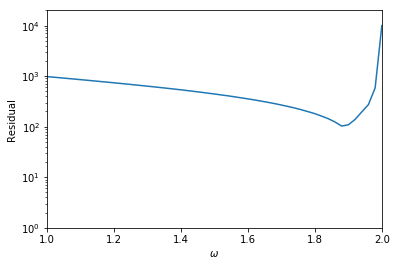

In [12]:

fig = plt.figure()
ax = plt.axes(xlim=[1, 2], ylim=[1, 20000])
ax.set_xlabel("$\omega$")
ax.set_ylabel("Residual")
ax.semilogy(on[:, 0], on[:, 1])
plt.show()

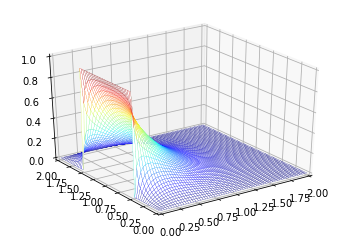

In [13]:
# First set up the figure, the axis, and the plot element we want to animate



plot_args = {'rstride': 1, 
             'cstride': 1,
             'cmap': "jet",
             'linewidth': 0.2,
             'antialiased': True,
             'shade': False}
fig = plt.figure()
ax = plt.axes(xlim = (0, Lx), ylim = (0, Ly), projection='3d')
surf = ax.plot_surface(X, Y, F[:, :],**plot_args)
plt.draw()
surf.set_edgecolors(surf.to_rgba(surf._A))
surf.set_facecolors("white")
ax.view_init(azim=235)
plt.show()

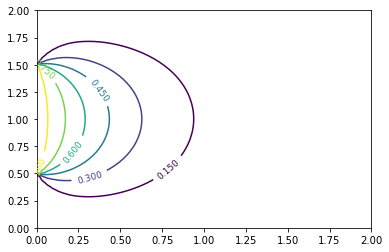

In [14]:
fig = plt.figure()
FC = plt.contour(X, Y, F[:, :])
plt.clabel(FC, fontsize=9, inline=1)
plt.show()

In [15]:
ResultFile = open("result.txt", "w")
for i in range(nx):
    for j in range(ny):
        ResultFile.write("%10.4F %10.4F %10.4F\n"%(X[i, j], Y[i, j], F[i, j]))
    ResultFile.write("\n")
ResultFile.close()